# Understanding Treemap and pivot table

**Resource**: IBM - Data Visualization with python - module 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


## Treemap

In [5]:
# Replace with your actual dataset or data source
data = {
    'Category': ['Category 1', 'Category 1', 'Category 2', 'Category 2', 'Category 3'],
    'Subcategory': ['Subcategory 1A', 'Subcategory 1B', 'Subcategory 2A', 'Subcategory 2B', 'Subcategory 3A'],
    'Value': [10, 20, 30, 40, 50]
}
df = pd.DataFrame(data)
df

,Category,Subcategory,Value
0,Category 1,Subcategory 1A,10
1,Category 1,Subcategory 1B,20
2,Category 2,Subcategory 2A,30
3,Category 2,Subcategory 2B,40
4,Category 3,Subcategory 3A,50


In [16]:
fig = px.treemap(df, path=['Category','Subcategory'],values='Value',title='Treemap example')

fig.show()

In [17]:
# Sales data
data2 = {
    'Category': ['Electronics', 'Electronics', 'Electronics', 
                 'Furniture', 'Furniture', 'Furniture', 
                 'Clothing', 'Clothing', 'Clothing'],
    'Subcategory': ['Laptops', 'Smartphones', 'Tablets', 
                    'Chairs', 'Tables', 'Sofas', 
                    'Men', 'Women', 'Kids'],
    'Sales': [120000, 80000, 30000, 
              50000, 40000, 20000, 
              70000, 90000, 40000]
}
sales_df = pd.DataFrame(data2)
sales_df

,Category,Subcategory,Sales
0,Electronics,Laptops,120000
1,Electronics,Smartphones,80000
2,Electronics,Tablets,30000
3,Furniture,Chairs,50000
4,Furniture,Tables,40000
5,Furniture,Sofas,20000
6,Clothing,Men,70000
7,Clothing,Women,90000
8,Clothing,Kids,40000


In [18]:
# draw treemap
fig2 = px.treemap(sales_df, path=['Category','Subcategory'], values='Sales',title='Treemap of Sales Data')
fig2.show()

## Pivot Table

In [23]:
import pandas as pd

# Manually creating data with repetition of categories and subcategories
data3 = [
    ['Item1', 'Electronics', 'Phones', 500],
    ['Item2', 'Electronics', 'Laptops', 800],
    ['Item3', 'Electronics', 'Headphones', 150],
    ['Item4', 'Clothing', 'Shirts', 30],
    ['Item5', 'Clothing', 'Pants', 45],
    ['Item6', 'Clothing', 'Jackets', 60],
    ['Item7', 'Furniture', 'Chairs', 120],
    ['Item8', 'Furniture', 'Tables', 250],
    ['Item9', 'Furniture', 'Sofas', 450],
    
    # Repeated categories and subcategories
    ['Item10', 'Electronics', 'Phones', 550],
    ['Item11', 'Electronics', 'Laptops', 750],
    ['Item12', 'Clothing', 'Shirts', 35],
    ['Item13', 'Clothing', 'Pants', 40],
    ['Item14', 'Furniture', 'Chairs', 130],
    ['Item15', 'Furniture', 'Sofas', 470],
    ['Item16', 'Electronics', 'Headphones', 160],
    ['Item17', 'Clothing', 'Jackets', 55],
    ['Item18', 'Furniture', 'Tables', 260],
    
    # More repetitions
    ['Item19', 'Electronics', 'Phones', 600],
    ['Item20', 'Clothing', 'Pants', 50],
    ['Item21', 'Furniture', 'Chairs', 140],
    ['Item22', 'Clothing', 'Shirts', 33],
    ['Item23', 'Furniture', 'Sofas', 490],
    ['Item24', 'Electronics', 'Laptops', 700],
    ['Item25', 'Clothing', 'Jackets', 65]
]

# Create DataFrame
df_cat = pd.DataFrame(data3, columns=['item', 'category', 'subcategory', 'value'])

# Display the first few rows
df_cat


,item,category,subcategory,value
0,Item1,Electronics,Phones,500
1,Item2,Electronics,Laptops,800
2,Item3,Electronics,Headphones,150
3,Item4,Clothing,Shirts,30
4,Item5,Clothing,Pants,45
5,Item6,Clothing,Jackets,60
6,Item7,Furniture,Chairs,120
7,Item8,Furniture,Tables,250
8,Item9,Furniture,Sofas,450
9,Item10,Electronics,Phones,550


In [24]:
df_cat.head()

,item,category,subcategory,value
0,Item1,Electronics,Phones,500
1,Item2,Electronics,Laptops,800
2,Item3,Electronics,Headphones,150
3,Item4,Clothing,Shirts,30
4,Item5,Clothing,Pants,45


In [41]:
pivot_df = df_cat.pivot_table(
    values='value', 
    index=['category', 'subcategory'],  # Group by category and subcategory
    aggfunc='sum'  # Aggregation function (e.g., sum of values)
)

pivot_df.index.name = None
pivot_df

value
category    subcategory       
Clothing    Jackets        180
            Pants          135
            Shirts          98
Electronics Headphones     310
            Laptops       2250
            Phones        1650
Furniture   Chairs         390
            Sofas         1410
            Tables         510

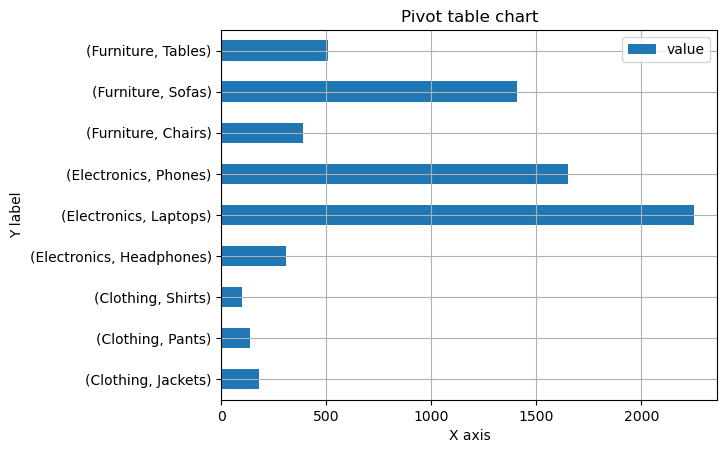

In [42]:
pivot_df.plot(kind='barh')
plt.title("Pivot table chart")
plt.xlabel("X axis")
plt.ylabel("Y label")
plt.grid()
plt.show()

**Another Example**

In [44]:
import numpy as np
# Define the parameters
num_quarters = 4
num_categories = 4
num_subcategories = 3
num_samples = num_quarters * num_categories * num_subcategories*50
# Generate sample sales data
np.random.seed(40)
# Creating sample data
dates = np.repeat(['Q1','Q2','Q3','Q4'], 50*num_categories * num_subcategories)
categories = np.tile(np.random.choice(['Laptops', 'Desktops', 'Peripherals', 'Software'], size=num_quarters*50), num_categories * num_subcategories)
subcategories = np.tile(np.random.choice(['Accessories', 'Components', 'Software Suites'], size=num_quarters*50), num_categories * num_subcategories)
sales_values = np.random.randint(1000, 5000, size=num_samples)
# Create DataFrame
df_prod = pd.DataFrame({
    'Date': dates,
    'Category': categories,
    'Subcategory': subcategories,
    'Sales': sales_values
})

df_prod

,Date,Category,Subcategory,Sales
0,Q1,Peripherals,Accessories,2092
1,Q1,Software,Accessories,4695
2,Q1,Software,Components,3106
3,Q1,Desktops,Accessories,3527
4,Q1,Laptops,Software Suites,1182
...,...,...,...,...
2395,Q4,Desktops,Accessories,2557
2396,Q4,Software,Accessories,2626
2397,Q4,Desktops,Components,2427
2398,Q4,Software,Components,1768


In [45]:
df_prod_pivot = df_prod.pivot_table(values='Sales',index=['Category','Subcategory'],aggfunc=sum)

df_prod_pivot

C:\Users\88017\AppData\Local\Temp\ipykernel_14416\3111727266.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



Sales
Category    Subcategory             
Desktops    Accessories       762618
            Components        432656
            Software Suites   590397
Laptops     Accessories       408645
            Components        624816
            Software Suites   309686
Peripherals Accessories       806506
            Components        528876
            Software Suites   395753
Software    Accessories       725524
            Components       1099386
            Software Suites   436885

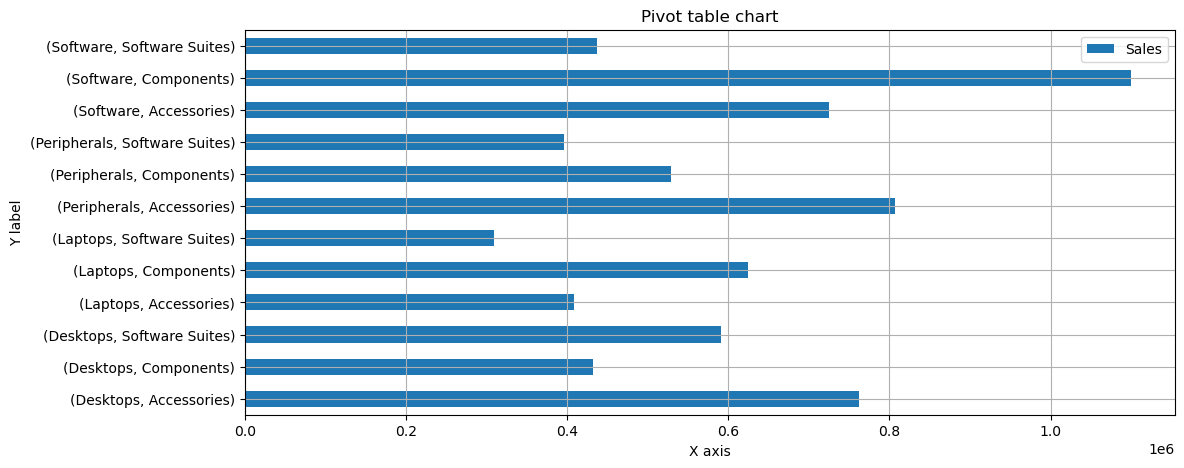

In [49]:
df_prod_pivot.plot(kind="barh",figsize=(12,5))
plt.title("Pivot table chart")
plt.xlabel("X axis")
plt.ylabel("Y label")
plt.grid()
plt.show()

In [52]:
# Date base data frame
pivot_table2 = df_prod.pivot_table(index='Date', columns=['Category','Subcategory'], values='Sales', aggfunc=np.sum)

pivot_table2


C:\Users\88017\AppData\Local\Temp\ipykernel_14416\2882983776.py:2: FutureWarning:

The provided callable <function sum at 0x000002099580AC00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



Category       Desktops                                Laptops             \
Subcategory Accessories Components Software Suites Accessories Components   
Date                                                                        
Q1               170130     107806          152291      101999     153553   
Q2               201848     108214          137190       93217     159472   
Q3               194730     110723          151582      103670     157925   
Q4               195910     105913          149334      109759     153866   

Category                    Peripherals                             \
Subcategory Software Suites Accessories Components Software Suites   
Date                                                                 
Q1                    68897      190885     128856          106307   
Q2                    79163      208009     130261          100111   
Q3                    75655      204317     138974           98675   
Q4                    85971      203295     130785           90660   

Category       Software                             
Subcategory Accessories Components Software Suites  
Date                                                
Q1               196864     262192          123906  
Q2               173165     284879           96807  
Q3               178655     273318          103518  
Q4               176840     278997          112654

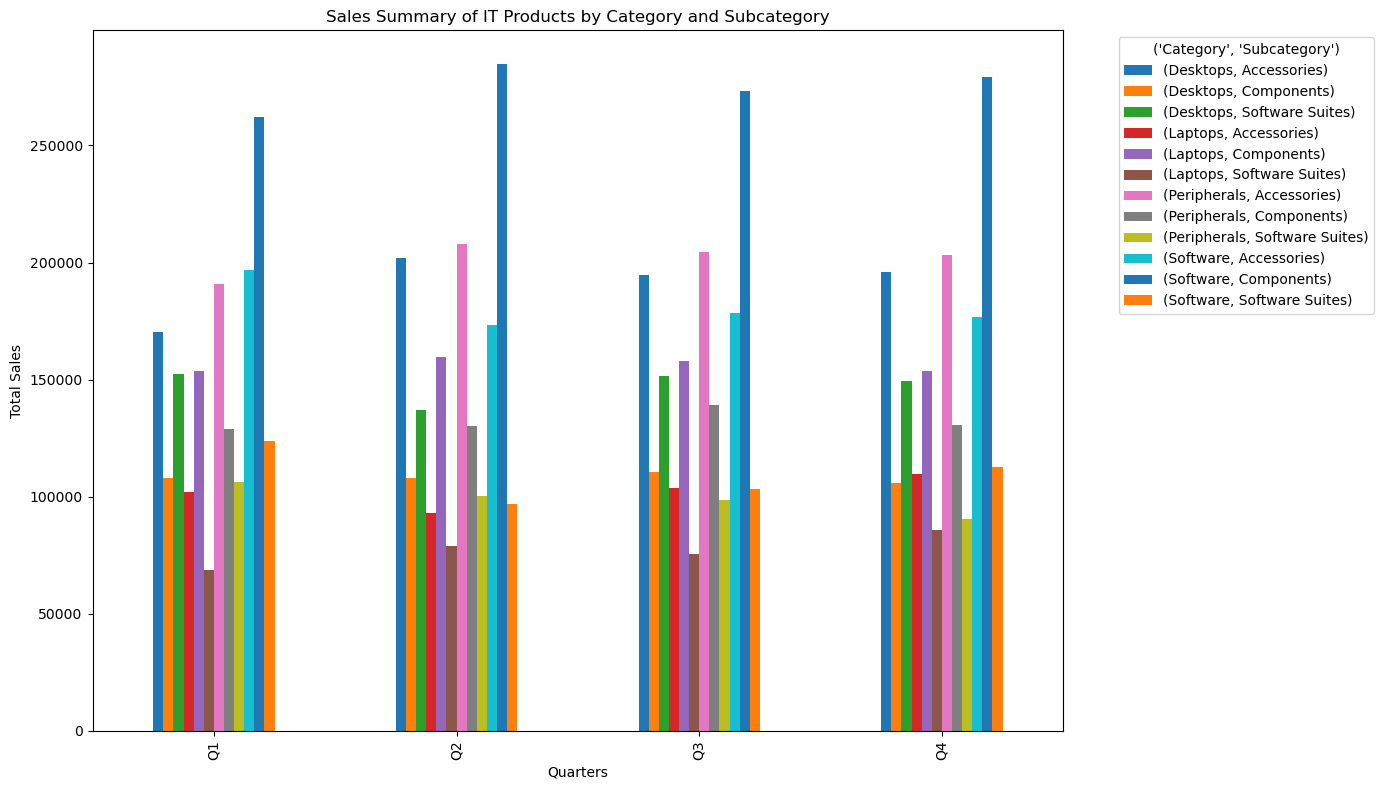

In [56]:
# Plotting a pivot chart
pivot_table2.plot(kind='bar', figsize=(14, 8))
plt.title('Sales Summary of IT Products by Category and Subcategory')
plt.xlabel('Quarters')
plt.ylabel('Total Sales')
plt.grid(False)
plt.legend(title=('Category', 'Subcategory'), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()